<a href="https://colab.research.google.com/github/gamea333/spam-detection-ml/blob/main/spam-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Detection (Text Classification)**

## **Objective:**

The goal of this task is to classify text data from three different languages (English, French, and German) as either Spam or Ham (not spam). You are required to train a machine learning model that can accurately classify the given dataset based on the provided text features.

## **0. Data Uploading**



In [2]:
from google.colab import files
uploaded=files.upload()
print(uploaded)




Saving Task_1.csv to Task_1.csv
{'Task_1.csv': b'labels,text\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."\nham,Ok lar... Joking wif u oni...\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s\nham,U dun say so early hor... U c already then say...\nham,"Nah I don\'t think he goes to usf, he lives around here though"\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv"\nham,Even my brother is not like to speak with me. They treat me like aids patent.\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\nspam,WINNER!! As a valued network customer you have been selected to receivea 

## **1. Data Loading & Preprocessing:**

* Load the dataset into a DataFrame.
* Check for missing values and clean or remove the data as necessary.
* Ensure that the dataset is balanced or handle imbalanced data if needed.

In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Loading the dataset
df = pd.read_csv('/content/Task_1.csv')
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nSample data:")
print(df.head())

# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())
print("\nUnique values in Label column:")
print(df['labels'].unique())
print("\nValue counts for Label column:")
print(df['labels'].value_counts())

print("\nClass distribution:")
class_distribution = df['labels'].value_counts(normalize=True)
print(class_distribution)

# Balancing the dataset
minority_class = class_distribution.index[-1]
majority_class = class_distribution.index[0]

df_minority = df[df['labels'] == minority_class]
df_majority = df[df['labels'] == majority_class]

df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_balanced = pd.concat([df_majority_undersampled, df_minority])
print("\nBalanced class distribution:")
print(df_balanced['labels'].value_counts(normalize=True))

print("\nFinal dataset shape:", df_balanced.shape)

print("\nSample of balanced dataset:")
print(df_balanced.head())


Dataset shape: (16716, 2)

Columns: Index(['labels', 'text'], dtype='object')

Sample data:
  labels                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

Missing values:
labels    0
text      0
dtype: int64

Unique values in Label column:
['ham' 'spam']

Value counts for Label column:
labels
ham     14475
spam     2241
Name: count, dtype: int64

Class distribution:
labels
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Balanced class distribution:
labels
ham     0.5
spam    0.5
Name: proportion, dtype: float64

Final dataset shape: (4482, 2)

Sample of balanced dataset:
      labels                                               text
12568    ham                Lol grand m

## **2. Feature Extraction:**

* Use a TfidfVectorizer to convert the text data into numerical representations for machine learning.
* The dataset contains text in multiple languages, so ensure that your vectorization is language-agnostic.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Using TfidfVectorizer for conversion
X = df_balanced['text']
y = df_balanced['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, sublinear_tf=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

feature_names = vectorizer.get_feature_names_out()
idf_scores = vectorizer.idf_
feature_idf_scores = list(zip(feature_names, idf_scores))
top_features = sorted(feature_idf_scores, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 features by IDF score:")
for feature, score in top_features:
    print(f"{feature}: {score}")

Training data shape: (3585, 10000)
Testing data shape: (897, 10000)

Top 10 features by IDF score:
avion: 8.491645473605132
bloo: 8.491645473605132
bloo bloo: 8.491645473605132
bottle: 8.491645473605132
brauchen mich: 8.491645473605132
bring bottle: 8.491645473605132
call him: 8.491645473605132
callertune: 8.491645473605132
changements: 8.491645473605132
changements da: 8.491645473605132


## **3. Model Training:**

* Train a Logistic Regression model on the preprocessed data.
* Understand the underlying principles of logistic regression as this will help in effective model implementation.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

coef = model.coef_[0]

top_positive_features = np.argsort(coef)[-10:]
top_negative_features = np.argsort(coef)[:10]
print("\nTop 10 features indicating Spam:")
for idx in top_positive_features[::-1]:
    print(f"{feature_names[idx]}: {coef[idx]:.4f}")

print("\nTop 10 features indicating Ham:")
for idx in top_negative_features:
    print(f"{feature_names[idx]}: {coef[idx]:.4f}")


Top 10 features indicating Spam:
txt: 4.4663
stop: 3.0936
www: 2.8950
call: 2.8494
mobile: 2.8480
text: 2.8133
rufen: 2.8009
uk: 2.6806
free: 2.5668
150p: 2.5631

Top 10 features indicating Ham:
ich: -3.7224
je: -3.3698
my: -2.0089
me: -1.8713
es: -1.8446
tu: -1.8178
gt: -1.8124
lt: -1.8004
pas: -1.7861
in: -1.7444


## **4. Model Evaluation:**

* Print the model's accuracy.
* Create a confusion matrix to visualize the model's performance on classifying Spam and Ham.

Model Accuracy: 0.9666

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       443
        spam       0.98      0.96      0.97       454

    accuracy                           0.97       897
   macro avg       0.97      0.97      0.97       897
weighted avg       0.97      0.97      0.97       897



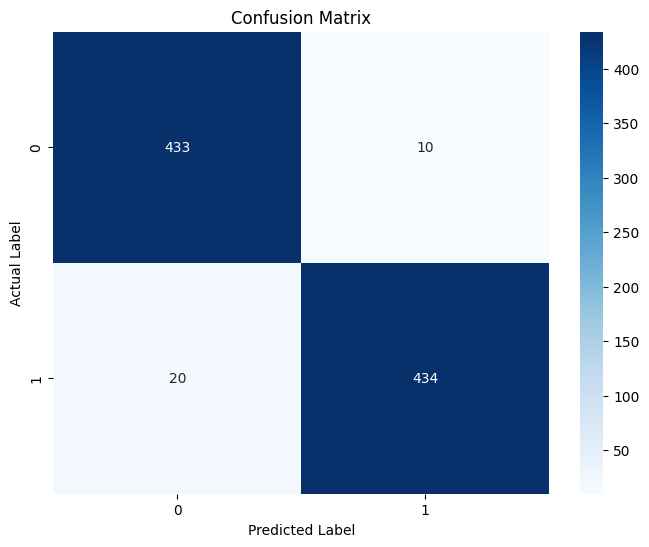


Confusion Matrix:
      Ham  Spam
Ham   433    10
Spam   20   434

Precision: 0.9775
Recall: 0.9559
F1 Score: 0.9666


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Model's Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
labels = ['Ham', 'Spam']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Additional Metrics
true_negative, false_positive, false_negative, true_positive = cm.ravel()
total = true_negative + false_positive + false_negative + true_positive

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

## **5. Hyperparameter Tuning:**

* Perform hyperparameter tuning on the logistic regression model to improve its accuracy.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'tfidf__max_features': 15000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.9679218967921897

Model Accuracy on Test Set: 0.9766

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       443
        spam       0.98      0.97      0.98       454

    accuracy                           0.98       897
   macro avg       0.98      0.98      0.98       897
weighted avg       0.98      0.98      0.98       897



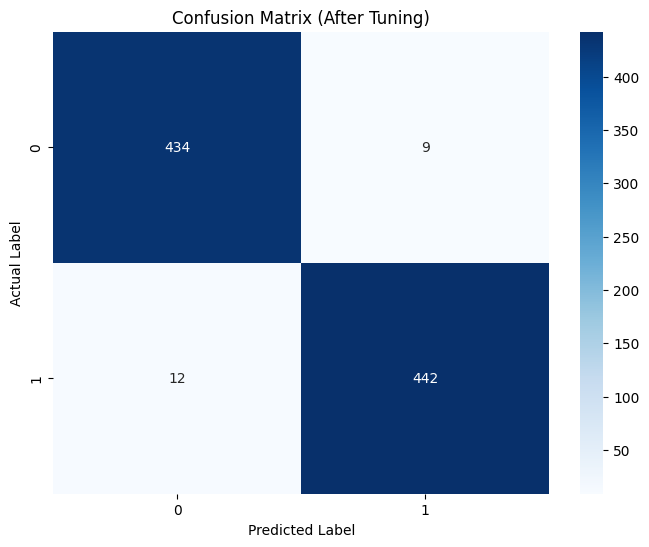


Top 10 most important features:
txt: 9.7772
stop: 6.7191
www: 6.1688
uk: 6.0182
mobile: 6.0107
text: 5.7891
rufen: 5.7444
150p: 5.5687
appelez: 5.3786
call: 5.3391

Top 10 least important features:
lt gt: -3.1592
amp: -3.3512
gt: -3.5008
my: -3.5094
da: -3.5686
lt: -3.6049
es: -3.6417
tu: -3.6477
ich: -5.5907
je: -5.6950


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#  Hyperparameter Tuning

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

param_grid = {
    'tfidf__max_features': [5000, 10000, 15000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (After Tuning)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importances
tfidf = best_model.named_steps['tfidf']
clf = best_model.named_steps['clf']
feature_names = tfidf.get_feature_names_out()
coef = clf.coef_[0]
feature_importance = sorted(zip(coef, feature_names), reverse=True)

print("\nTop 10 most important features:")
for coef, feature in feature_importance[:10]:
    print(f"{feature}: {coef:.4f}")

print("\nTop 10 least important features:")
for coef, feature in feature_importance[-10:]:
    print(f"{feature}: {coef:.4f}")